In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

In [12]:
from google.colab import files
uploaded = files.upload()

Saving CNCnoise_1.csv to CNCnoise_1 (2).csv


In [13]:
data = pd.read_csv("CNCnoise_1.csv", header=None)
data.columns = ['noise']

In [4]:
# 윈도우 시계열 구성
def create_dataset(data, look_back=10):
    X, y = [], []
    for i in range(len(data) - look_back):
        window = data[i:(i + look_back)].values.flatten()
        target = data[i + look_back]
        X.append(window)
        y.append(target)
    return np.array(X), np.array(y)

look_back = 10
X, y = create_dataset(data['noise'], look_back)

In [14]:
# 1. K-NN 이상치 탐지 (앞부분 일부만)
sample_size = 60000
X_sampled = X[:sample_size]
y_sampled = y[:sample_size]  # KNN에 맞게 y도 자름

knn = NearestNeighbors(n_neighbors=5)
knn.fit(X_sampled)
distances, _ = knn.kneighbors(X_sampled)
avg_distances = distances.mean(axis=1)
threshold_knn = np.percentile(avg_distances, 95)
is_outlier_knn = avg_distances > threshold_knn

In [15]:
# 2. 선형 회귀 기반 이상치 탐지 (전체)
reg = SklearnLinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
residuals = np.abs(y - y_pred)
threshold_lr = np.percentile(residuals, 95)
is_outlier_lr = residuals > threshold_lr

In [16]:
# 3. 시각화

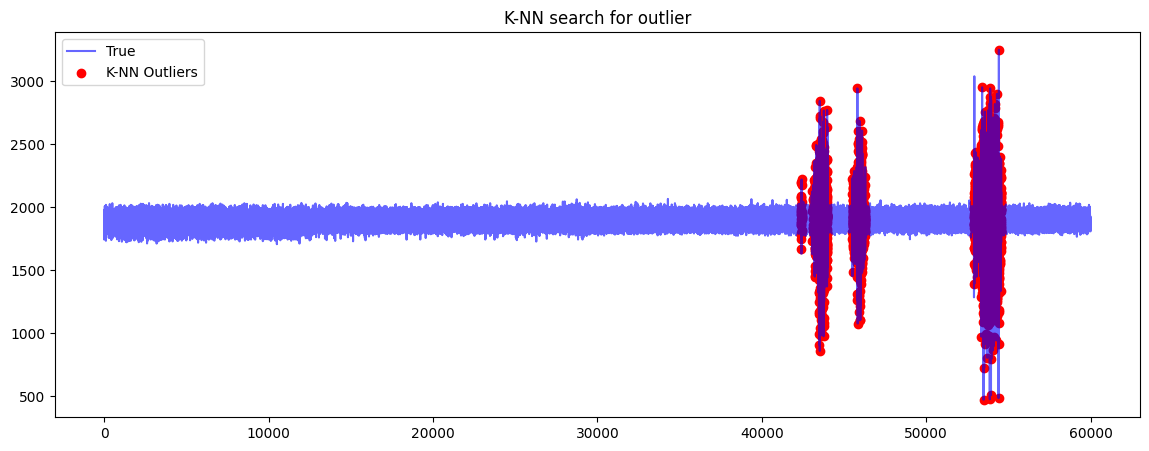

In [18]:

# K-NN
plt.figure(figsize=(14, 5))
plt.plot(np.arange(sample_size), y_sampled, label='True', color='blue', alpha=0.6)
plt.scatter(np.where(is_outlier_knn)[0], y_sampled[is_outlier_knn], color='red', label='K-NN Outliers')
plt.title("K-NN search for outlier")
plt.legend()
plt.show()

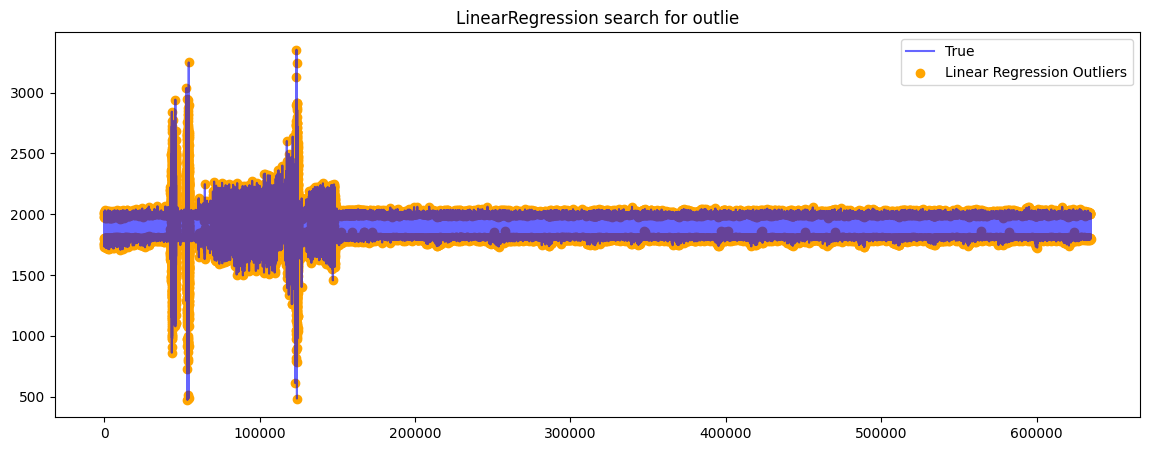

In [19]:
# Linear Regression
plt.figure(figsize=(14, 5))
plt.plot(np.arange(len(y)), y, label='True', color='blue', alpha=0.6)
plt.scatter(np.where(is_outlier_lr)[0], y[is_outlier_lr], color='orange', label='Linear Regression Outliers')
plt.title("LinearRegression search for outlier")
plt.legend()
plt.show()